# 120 Years of Olympic History data analysis
Before answering the questions, let's at first load the data into pandas dataframes and display them:

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

athletes_df = pd.read_csv("data/athlete_events.csv")
athletes_df

ID                      Name Sex   Age  Height  Weight  \
0            1                 A Dijiang   M  24.0   180.0    80.0   
1            2                  A Lamusi   M  23.0   170.0    60.0   
2            3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN   
3            4      Edgar Lindenau Aabye   M  34.0     NaN     NaN   
4            5  Christine Jacoba Aaftink   F  21.0   185.0    82.0   
...        ...                       ...  ..   ...     ...     ...   
271111  135569                Andrzej ya   M  29.0   179.0    89.0   
271112  135570                  Piotr ya   M  27.0   176.0    59.0   
271113  135570                  Piotr ya   M  27.0   176.0    59.0   
271114  135571        Tomasz Ireneusz ya   M  30.0   185.0    96.0   
271115  135571        Tomasz Ireneusz ya   M  34.0   185.0    96.0   

                  Team  NOC        Games  Year  Season            City  \
0                China  CHN  1992 Summer  1992  Summer       Barcelona   
1                China  CHN  2012 Summer  2012  Summer          London   
2              Denmark  DEN  1920 Summer  1920  Summer       Antwerpen   
3       Denmark/Sweden  DEN  1900 Summer  1900  Summer           Paris   
4          Netherlands  NED  1988 Winter  1988  Winter         Calgary   
...                ...  ...          ...   ...     ...             ...   
271111        Poland-1  POL  1976 Winter  1976  Winter       Innsbruck   
271112          Poland  POL  2014 Winter  2014  Winter           Sochi   
271113          Poland  POL  2014 Winter  2014  Winter           Sochi   
271114          Poland  POL  1998 Winter  1998  Winter          Nagano   
271115          Poland  POL  2002 Winter  2002  Winter  Salt Lake City   

                Sport                                     Event Medal  
0          Basketball               Basketball Men's Basketball   NaN  
1                Judo              Judo Men's Extra-Lightweight   NaN  
2            Football                   Football Men's Football   NaN  
3          Tug-Of-War               Tug-Of-War Men's Tug-Of-War  Gold  
4       Speed Skating          Speed Skating Women's 500 metres   NaN  
...               ...                                       ...   ...  
271111           Luge                Luge Mixed (Men)'s Doubles   NaN  
271112    Ski Jumping  Ski Jumping Men's Large Hill, Individual   NaN  
271113    Ski Jumping        Ski Jumping Men's Large Hill, Team   NaN  
271114      Bobsleigh                      Bobsleigh Men's Four   NaN  
271115      Bobsleigh                      Bobsleigh Men's Four   NaN  

[271116 rows x 15 columns]

Let's preprocess this dataframe a bit. At first - splitting the name into given name and surname:

In [2]:
def preprocess_name(name):
    """Preprocess an athlete name
    Splits the name given as argument and considers surname as the last part of the resulting list
    If the surname happens to be "Jr." or "Sr.", it picks the surname as second from last element, and the rest as given name
    Also removes parts of the name which contain parentheses.
    """
    parts = name.split()
    parts = [p for p in parts if not (p.endswith(')') or p.startswith('('))] # not sure what the surnames in parentheses mean
    given_name = ' '.join(parts[:-1])
    surname = parts[-1]
    if surname in ["Jr.", "Sr."]:
        given_name = ' '.join(parts[:-2])
        surname = parts[-2]
    return pd.Series((given_name, surname))
    
athletes_df[["Given name", "Surname"]] = athletes_df["Name"].apply(preprocess_name)
athletes_df

ID                      Name Sex   Age  Height  Weight  \
0            1                 A Dijiang   M  24.0   180.0    80.0   
1            2                  A Lamusi   M  23.0   170.0    60.0   
2            3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN   
3            4      Edgar Lindenau Aabye   M  34.0     NaN     NaN   
4            5  Christine Jacoba Aaftink   F  21.0   185.0    82.0   
...        ...                       ...  ..   ...     ...     ...   
271111  135569                Andrzej ya   M  29.0   179.0    89.0   
271112  135570                  Piotr ya   M  27.0   176.0    59.0   
271113  135570                  Piotr ya   M  27.0   176.0    59.0   
271114  135571        Tomasz Ireneusz ya   M  30.0   185.0    96.0   
271115  135571        Tomasz Ireneusz ya   M  34.0   185.0    96.0   

                  Team  NOC        Games  Year  Season            City  \
0                China  CHN  1992 Summer  1992  Summer       Barcelona   
1                China  CHN  2012 Summer  2012  Summer          London   
2              Denmark  DEN  1920 Summer  1920  Summer       Antwerpen   
3       Denmark/Sweden  DEN  1900 Summer  1900  Summer           Paris   
4          Netherlands  NED  1988 Winter  1988  Winter         Calgary   
...                ...  ...          ...   ...     ...             ...   
271111        Poland-1  POL  1976 Winter  1976  Winter       Innsbruck   
271112          Poland  POL  2014 Winter  2014  Winter           Sochi   
271113          Poland  POL  2014 Winter  2014  Winter           Sochi   
271114          Poland  POL  1998 Winter  1998  Winter          Nagano   
271115          Poland  POL  2002 Winter  2002  Winter  Salt Lake City   

                Sport                                     Event Medal  \
0          Basketball               Basketball Men's Basketball   NaN   
1                Judo              Judo Men's Extra-Lightweight   NaN   
2            Football                   Football Men's Football   NaN   
3          Tug-Of-War               Tug-Of-War Men's Tug-Of-War  Gold   
4       Speed Skating          Speed Skating Women's 500 metres   NaN   
...               ...                                       ...   ...   
271111           Luge                Luge Mixed (Men)'s Doubles   NaN   
271112    Ski Jumping  Ski Jumping Men's Large Hill, Individual   NaN   
271113    Ski Jumping        Ski Jumping Men's Large Hill, Team   NaN   
271114      Bobsleigh                      Bobsleigh Men's Four   NaN   
271115      Bobsleigh                      Bobsleigh Men's Four   NaN   

              Given name  Surname  
0                      A  Dijiang  
1                      A   Lamusi  
2         Gunnar Nielsen     Aaby  
3         Edgar Lindenau    Aabye  
4       Christine Jacoba  Aaftink  
...                  ...      ...  
271111           Andrzej       ya  
271112             Piotr       ya  
271113             Piotr       ya  
271114   Tomasz Ireneusz       ya  
271115   Tomasz Ireneusz       ya  

[271116 rows x 17 columns]

Seems like the "Team" column not always contains the country of the athlete - let's fix that by merging with another dataframe, which contains the "NOC" column along with the country:

In [3]:
countries_df = pd.read_csv("data/country_definitions.csv")
countries_df

NOC       region                 notes
0    AFG  Afghanistan                   NaN
1    AHO      Curacao  Netherlands Antilles
2    ALB      Albania                   NaN
3    ALG      Algeria                   NaN
4    AND      Andorra                   NaN
..   ...          ...                   ...
225  YEM        Yemen                   NaN
226  YMD        Yemen           South Yemen
227  YUG       Serbia            Yugoslavia
228  ZAM       Zambia                   NaN
229  ZIM     Zimbabwe                   NaN

[230 rows x 3 columns]

In [4]:
athletes_df = athletes_df.merge(countries_df[["NOC", "region"]]) # only care about the region
athletes_df

ID                Name Sex   Age  Height  Weight     Team  NOC  \
0            1           A Dijiang   M  24.0   180.0    80.0    China  CHN   
1            2            A Lamusi   M  23.0   170.0    60.0    China  CHN   
2          602       Abudoureheman   M  22.0   182.0    75.0    China  CHN   
3         1463           Ai Linuer   M  25.0   160.0    62.0    China  CHN   
4         1464           Ai Yanhan   F  14.0   168.0    54.0    China  CHN   
...        ...                 ...  ..   ...     ...     ...      ...  ...   
270762  120575     Mamorallo Tjoka   F  23.0   150.0    56.0  Lesotho  LES   
270763  120575     Mamorallo Tjoka   F  27.0   150.0    56.0  Lesotho  LES   
270764  122166  M'apotlaki Ts'elho   F  15.0     NaN     NaN  Lesotho  LES   
270765  122215          Lefa Tsapi   M  23.0   170.0    63.0  Lesotho  LES   
270766  122299       Mosolesa Tsie   M  20.0   175.0    75.0  Lesotho  LES   

              Games  Year  Season            City       Sport  \
0       1992 Summer  1992  Summer       Barcelona  Basketball   
1       2012 Summer  2012  Summer          London        Judo   
2       2000 Summer  2000  Summer          Sydney      Boxing   
3       2004 Summer  2004  Summer          Athina   Wrestling   
4       2016 Summer  2016  Summer  Rio de Janeiro    Swimming   
...             ...   ...     ...             ...         ...   
270762  2008 Summer  2008  Summer         Beijing   Athletics   
270763  2012 Summer  2012  Summer          London   Athletics   
270764  1996 Summer  1996  Summer         Atlanta   Athletics   
270765  1984 Summer  1984  Summer     Los Angeles      Boxing   
270766  2000 Summer  2000  Summer          Sydney      Boxing   

                                           Event Medal  Given name  \
0                    Basketball Men's Basketball   NaN           A   
1                   Judo Men's Extra-Lightweight   NaN           A   
2                      Boxing Men's Middleweight   NaN               
3       Wrestling Men's Lightweight, Greco-Roman   NaN          Ai   
4          Swimming Women's 200 metres Freestyle   NaN          Ai   
...                                          ...   ...         ...   
270762                Athletics Women's Marathon   NaN   Mamorallo   
270763                Athletics Women's Marathon   NaN   Mamorallo   
270764    Athletics Women's 4 x 100 metres Relay   NaN  M'apotlaki   
270765                 Boxing Men's Welterweight   NaN        Lefa   
270766                 Boxing Men's Welterweight   NaN    Mosolesa   

              Surname   region  
0             Dijiang    China  
1              Lamusi    China  
2       Abudoureheman    China  
3              Linuer    China  
4              Yanhan    China  
...               ...      ...  
270762          Tjoka  Lesotho  
270763          Tjoka  Lesotho  
270764        Ts'elho  Lesotho  
270765          Tsapi  Lesotho  
270766           Tsie  Lesotho  

[270767 rows x 18 columns]

Let's also look at the statistics of the dataframe so far:

In [5]:
athletes_df.describe()

ID            Age         Height         Weight  \
count  270767.000000  261305.000000  210684.000000  207982.000000   
mean    68229.276832      25.559783     175.344250      70.709523   
std     39017.998824       6.392501      10.519556      14.350094   
min         1.000000      10.000000     127.000000      25.000000   
25%     34630.500000      21.000000     168.000000      60.000000   
50%     68187.000000      24.000000     175.000000      70.000000   
75%    102065.500000      28.000000     183.000000      79.000000   
max    135571.000000      97.000000     226.000000     214.000000   

                Year  
count  270767.000000  
mean     1978.362297  
std        29.884637  
min      1896.000000  
25%      1960.000000  
50%      1988.000000  
75%      2002.000000  
max      2016.000000

Seems like the values are more or less consistent with what one would expect (meaning there are no 5-meter people, or someone weighing more than a Mount Rushmore).

Looking at the count, there are missing values in some columns. This might cause the answers below to be slightly off from the truth.

### What countries receive the most medals nowadays? Does it change much across the timespan?
Let's create at first a dataframe containing only athletes which won some medal:

In [6]:
medal_athletes_df = athletes_df[athletes_df["Medal"].notna()]
medal_athletes_df

ID               Name Sex   Age  Height  Weight     Team  NOC  \
8         3610          An Yulong   M  19.0   173.0    70.0    China  CHN   
10        3610          An Yulong   M  19.0   173.0    70.0    China  CHN   
11        3610          An Yulong   M  23.0   173.0    70.0    China  CHN   
12        3611        An Zhongxin   F  23.0   170.0    65.0    China  CHN   
17        6381             Ba Yan   F  21.0   183.0    78.0    China  CHN   
...        ...                ...  ..   ...     ...     ...      ...  ...   
270486   48962       Hong Anh Tun   M  23.0   152.0    56.0  Vietnam  VIE   
270492   48966      Hong Xun Vinh   M  41.0   175.0    75.0  Vietnam  VIE   
270493   48966      Hong Xun Vinh   M  41.0   175.0    75.0  Vietnam  VIE   
270596  121646        Trn Hiu Ngn   F  26.0   157.0    47.0  Vietnam  VIE   
270693   58601  Majlinda Kelmendi   F  25.0   162.0    52.0   Kosovo  KOS   

              Games  Year  Season            City                      Sport  \
8       1998 Winter  1998  Winter          Nagano  Short Track Speed Skating   
10      1998 Winter  1998  Winter          Nagano  Short Track Speed Skating   
11      2002 Winter  2002  Winter  Salt Lake City  Short Track Speed Skating   
12      1996 Summer  1996  Summer         Atlanta                   Softball   
17      1984 Summer  1984  Summer     Los Angeles                 Basketball   
...             ...   ...     ...             ...                        ...   
270486  2008 Summer  2008  Summer         Beijing              Weightlifting   
270492  2016 Summer  2016  Summer  Rio de Janeiro                   Shooting   
270493  2016 Summer  2016  Summer  Rio de Janeiro                   Shooting   
270596  2000 Summer  2000  Summer          Sydney                  Taekwondo   
270693  2016 Summer  2016  Summer  Rio de Janeiro                       Judo   

                                                    Event   Medal Given name  \
8              Short Track Speed Skating Men's 500 metres  Silver         An   
10      Short Track Speed Skating Men's 5,000 metres R...  Bronze         An   
11      Short Track Speed Skating Men's 5,000 metres R...  Bronze         An   
12                              Softball Women's Softball  Silver         An   
17                          Basketball Women's Basketball  Bronze         Ba   
...                                                   ...     ...        ...   
270486                   Weightlifting Men's Bantamweight  Silver   Hong Anh   
270492               Shooting Men's Air Pistol, 10 metres    Gold   Hong Xun   
270493              Shooting Men's Free Pistol, 50 metres  Silver   Hong Xun   
270596                    Taekwondo Women's Featherweight  Silver    Trn Hiu   
270693                      Judo Women's Half-Lightweight    Gold   Majlinda   

         Surname   region  
8         Yulong    China  
10        Yulong    China  
11        Yulong    China  
12      Zhongxin    China  
17           Yan    China  
...          ...      ...  
270486       Tun  Vietnam  
270492      Vinh  Vietnam  
270493      Vinh  Vietnam  
270596       Ngn  Vietnam  
270693  Kelmendi   Kosovo  

[39774 rows x 18 columns]

In [7]:
medal_count = medal_athletes_df.groupby(["Year", "region"], as_index=False)["Medal"].count()
medal_count.rename(columns={"Medal": "Count", "region": "Region"}, inplace=True)
medal_count

Year                Region  Count
0     1896             Australia      3
1     1896               Austria      5
2     1896               Denmark      6
3     1896                France     11
4     1896               Germany     32
...    ...                   ...    ...
1424  2016               Ukraine     15
1425  2016  United Arab Emirates      1
1426  2016            Uzbekistan     13
1427  2016             Venezuela      3
1428  2016               Vietnam      2

[1429 rows x 3 columns]

Seems like some countries won only few medals. Let's modify the above dataframe so that always only top 3 countries are considered for a given year:

In [8]:
medal_count = medal_count.sort_values("Count", ascending=False).groupby("Year", as_index=False).head(3)
medal_count

Year   Region  Count
619  1980   Russia    496
45   1904      USA    394
81   1908       UK    368
719  1988   Russia    366
677  1984      USA    361
..    ...      ...    ...
800  1994   Canada     37
810  1994   Russia     36
4    1896  Germany     32
9    1896      USA     20
39   1904  Germany     16

[105 rows x 3 columns]

The amount of won medals clearly changes during consequent years. Let's modify the dataframe again, this time adding a percentage of total medals won among the top countries for a given year.

This operation gives a better idea how the country behaved during olympic games in the past.
Because the total number of medals won changes from year to year, it's easier to spot the change when looking at such relative measure.

In [9]:
def perc_score(x):
    x["Percent of won medals"] = x["Count"] / x["Count"].sum()
    return x

medal_count = medal_count.groupby("Year", as_index=False).apply(perc_score)
medal_count

Year   Region  Count  Percent of won medals
619  1980   Russia    496               0.552339
45   1904      USA    394               0.860262
81   1908       UK    368               0.711799
719  1988   Russia    366               0.396963
677  1984      USA    361               0.542042
..    ...      ...    ...                    ...
800  1994   Canada     37               0.327434
810  1994   Russia     36               0.318584
4    1896  Germany     32               0.320000
9    1896      USA     20               0.200000
39   1904  Germany     16               0.034934

[105 rows x 4 columns]

In [10]:
plt.figure(figsize=(10, 7), dpi=300)
sns.set_theme(style="darkgrid")
sns.lineplot(data=medal_count, x="Year", y="Percent of won medals", style="Region", hue="Region")
plt.tight_layout()

Seems like USA, Russia, Canada and Germany are among the countries which win most medals at each olympic games. This trend seems to be there for over 100 years (with the exception of Russia).

Seems like Canada is improving each time they participate. UK on the other hand seems to be staying on the same level for years.

### Who wins the most medals? Women or men?
This is easy to check with a `groupby` method:

In [11]:
plt.figure(figsize=(5, 3), dpi=300)
medal_athletes_df.groupby("Sex")["Medal"].count().plot(kind="bar")
plt.tight_layout()

Seems like men win more medals (around 2.5 times more).

### What’s the trend for the number of participants?

We can use the same method from the previous question, this time grouping by year.

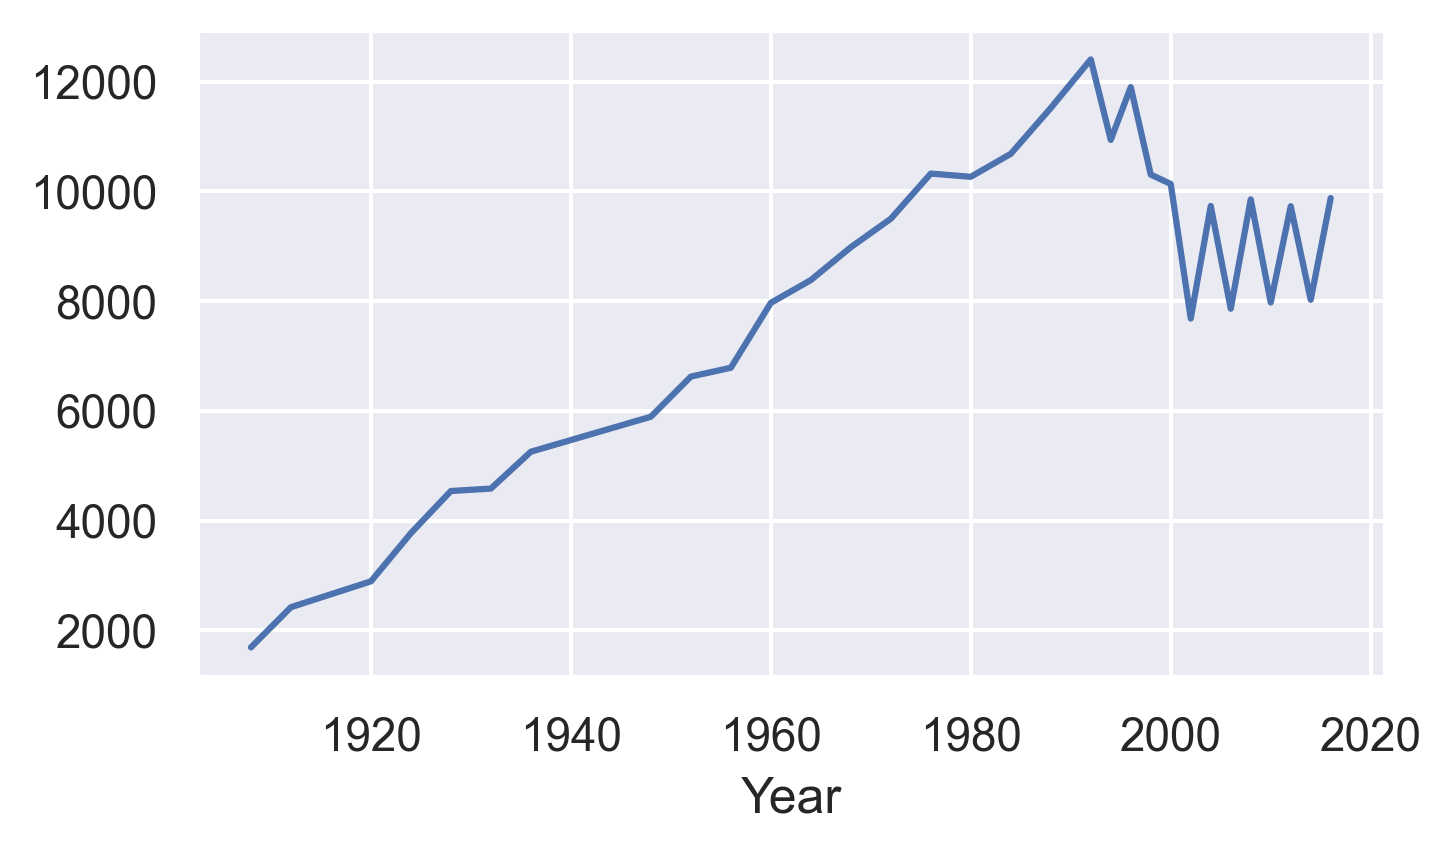

In [12]:
plt.figure(figsize=(5, 3), dpi=300)
athletes_df.groupby("Year")["ID"].count().rolling(5).mean().plot(kind="line")
plt.tight_layout()

The overall trend of number of participants seems to be increasing until around year 2000, when it starts to stay around the same value.

The plot wobbles around because (probably) the olympic games in winter are held not on the same day as the summer olympic games. This would require splitting the dataset into two separate tournaments.

### What is the relation between age and medals won?

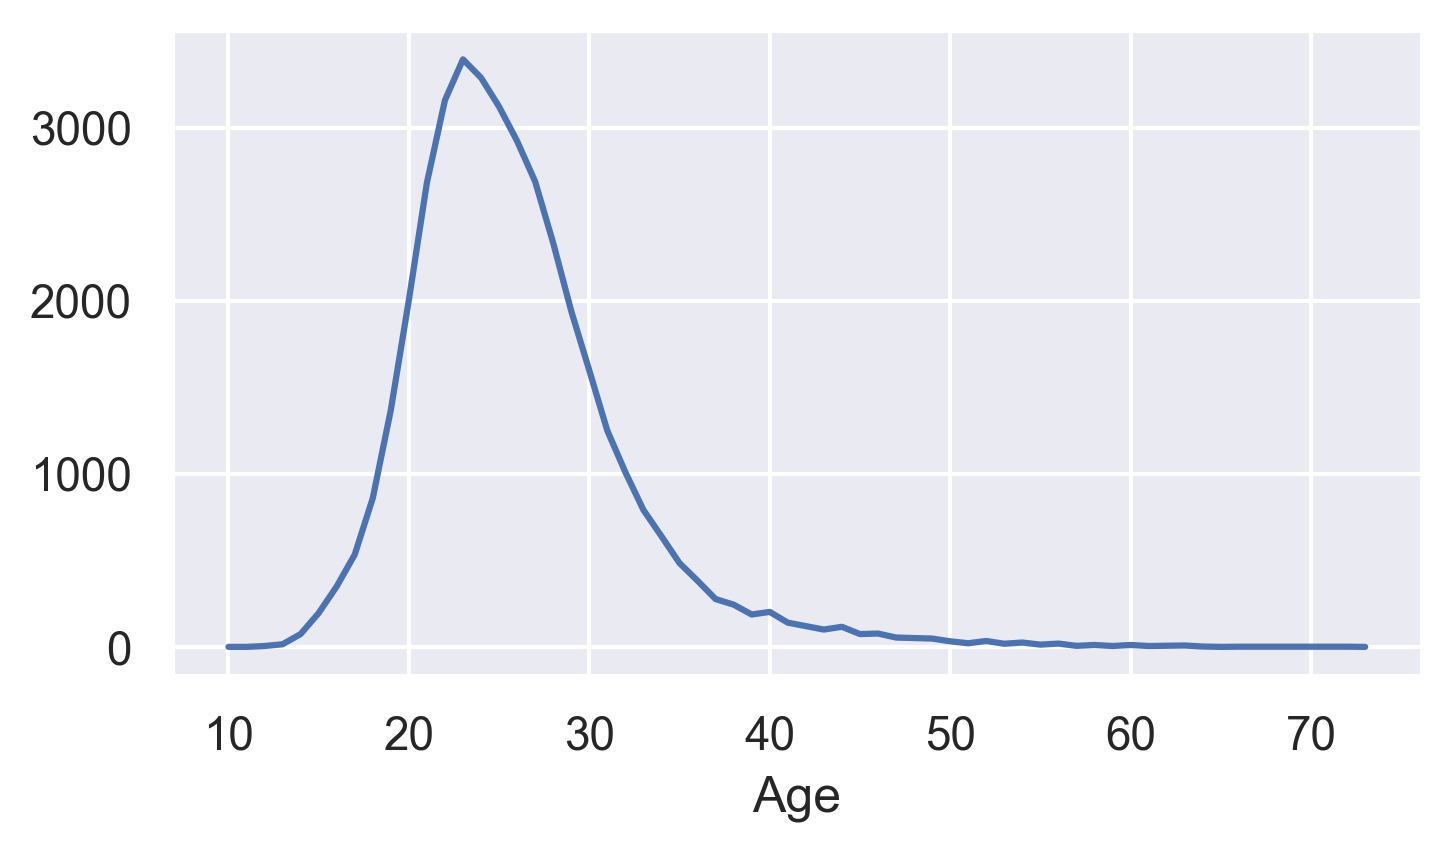

In [13]:
plt.figure(figsize=(5, 3), dpi=300)
medal_athletes_df.groupby("Age")["ID"].count().plot()
plt.tight_layout()

Seems like most athletes who won medals are from age 18 to 35. Anyone below or above this age range is less likely to win a medal.

### Do tall people win more medals?

I'm gonna consider tall people to be anyone who is over 190 cm.
Let's create a new dataframe, with additional column denoting whether someone is tall or not:

In [14]:
tall_athletes_df = medal_athletes_df.copy()
tall_athletes_df["IsTall"] = tall_athletes_df["Height"] > 190
tall_athletes_df["IsTall"]

8         False
10        False
11        False
12        False
17        False
          ...  
270486    False
270492    False
270493    False
270596    False
270693    False
Name: IsTall, Length: 39774, dtype: bool

In [15]:
plt.figure(figsize=(5, 3), dpi=300)
tall_athletes_df.groupby("IsTall")["Medal"].count().plot(kind="bar")
plt.tight_layout()

Looks like tall people don't win more medals - it's quite opposite, they seem to win much less medals (of course the above depends on how one defines a tall person).

There might a be a reson behind such discrepancy - the height is something that follows a certain normal distribution. Finding tall people might is harder, so it's kinda obvious they win less medals, since there's less of them during olympics.

### Which sports are dominated by short people? (You must define "short")

Same as above, just this time I'm gonna pick people who have have a height smaller than 160.

In [16]:
short_athletes_df = athletes_df.copy()
short_athletes_df["IsShort"] = short_athletes_df["Height"] < 190
short_athletes_df["IsShort"]

0          True
1          True
2          True
3          True
4          True
          ...  
270762     True
270763     True
270764    False
270765     True
270766     True
Name: IsShort, Length: 270767, dtype: bool

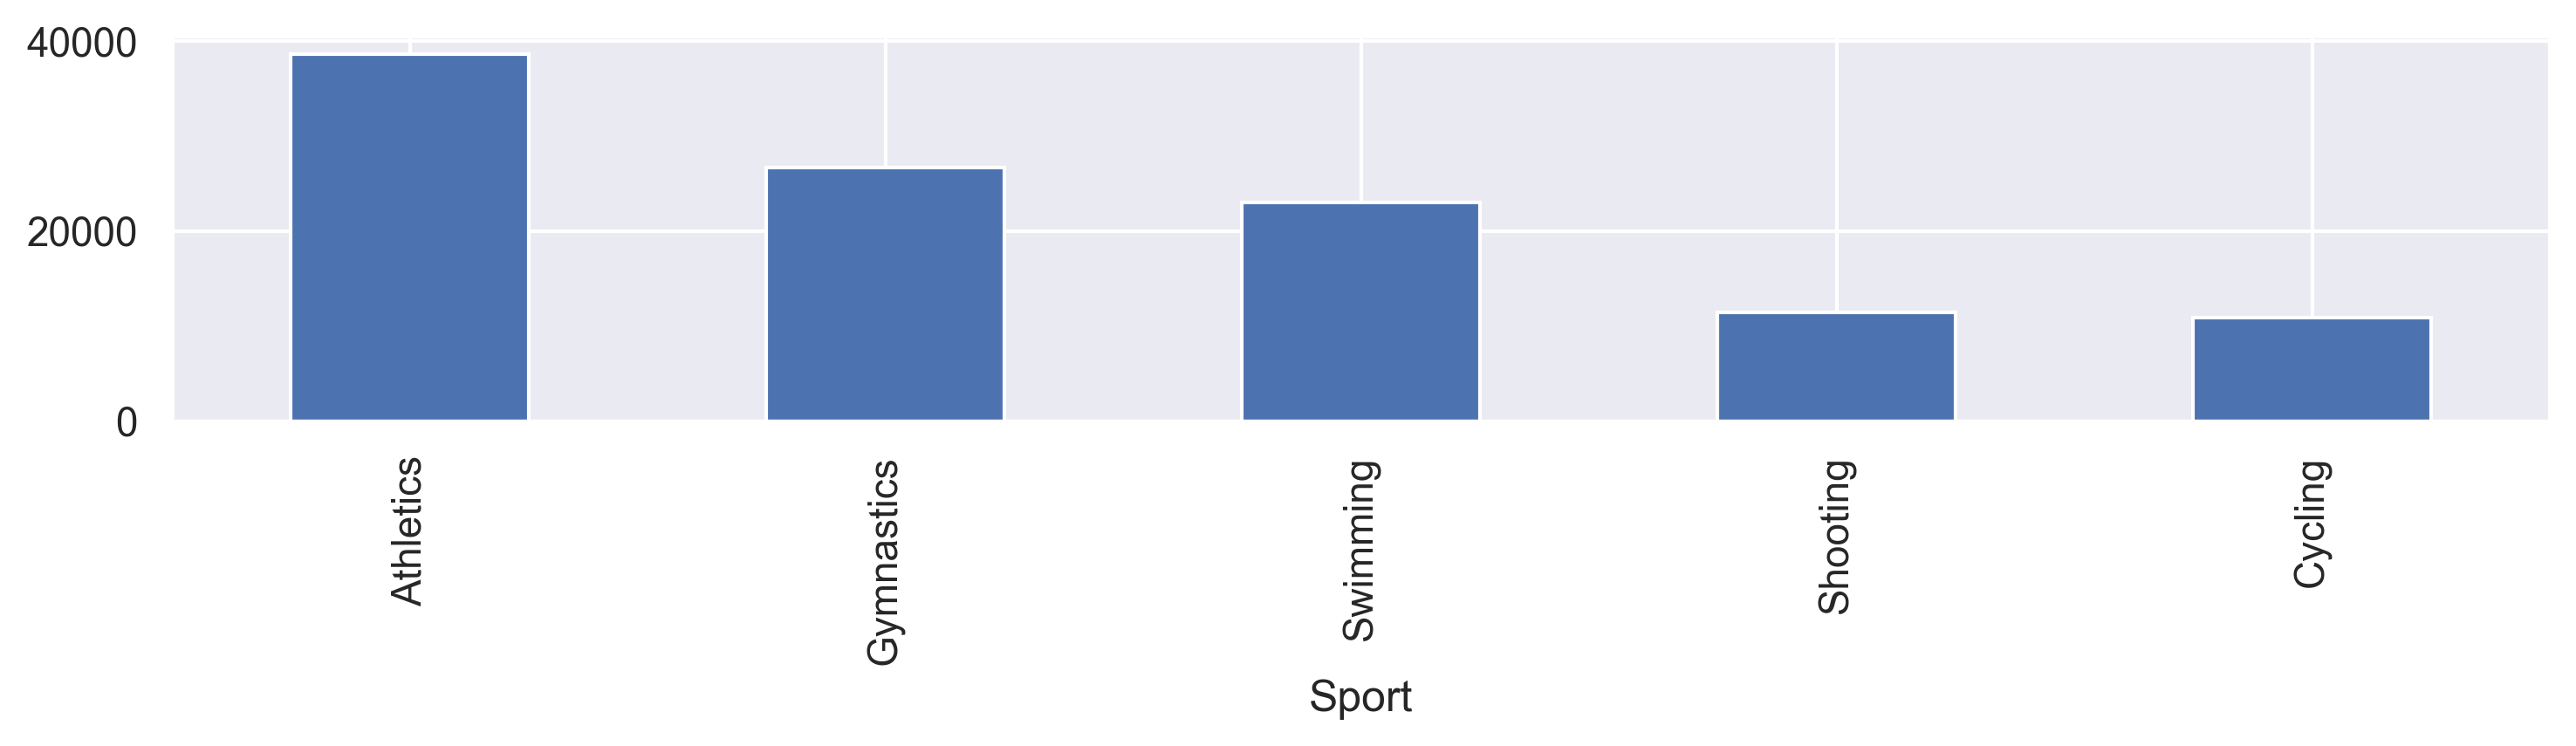

In [17]:
plt.figure(figsize=(10, 3), dpi=300)
short_athletes_df.groupby("Sport")["Sport"].count().sort_values(ascending=False).head(5).plot(kind="bar")
plt.tight_layout()

Seems like people below a height of 160 cm preffer athletics, gymnastics, swimming, shooting and cycling.

### Which families (same surname) win the most medals?

In [18]:
medal_athletes_df.groupby("Surname")["Surname"].count().sort_values(ascending=False).head(10)

Surname
Smith        93
Johnson      74
Hansen       73
Jones        62
Williams     60
Silva        53
Brown        49
Johansson    48
Andersson    48
Mller        44
Name: Surname, dtype: int64

Family names which win the most medals:
- Smith
- Johnson
- Hansen
- Jones
- Williams

All of the family names sound like they belong to someone living in an english-speaking country.
This might be a result of USA being one of the top countries which bring the most medals home.

## Summary, possible improvements

It seems that the winter and summer versions of the games are not held at the same year, so this introduces some problems in the later years.

It would be good idea to split the dataset into two versions - one of summer and one for winter games.

Overall, the dataset has a quite good quality for analysing - the missing values for age, height etc. don't harm the results, there is consistency in datatypes, the units are common.